In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

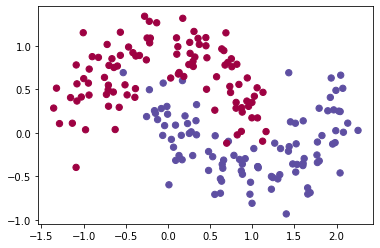

In [ ]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [ ]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [ ]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [ ]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [ ]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [ ]:
# Define function build_model that learns parameters for the neural network and returns the model and has following 3 arguments/parameters.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations


# This function should perfrom  Forwardpropagation, Backpropagation and weightupdate.

# Steps
# Initialize the parameters to random values.
# This is what we return at the end
# Gradient descent. For each batch...for loop will be used that will repeat equal to num_passes
#  for i in range(0, num_passes):
# Forward propagation
# Back propagation
# Gradient descent parameter update
# Assign new parameters to the model
 # Optionally print the loss.
# This is expensive because it uses the whole dataset, so we don't want to do it too often.
if print_loss and i % 1000 == 0:
 #print "Loss after iteration %i: %f" %(i, calculate_loss(model))
 print ('Loss after iteration: ', i, ' loss : ', calculate_loss(model)) 
 # at end return model.

Loss after iteration:  0  loss :  0.5465442859821489
Loss after iteration:  1000  loss :  0.323276036018922
Loss after iteration:  2000  loss :  0.3123169326422663
Loss after iteration:  3000  loss :  0.3178659884859086
Loss after iteration:  4000  loss :  0.32098909843816664
Loss after iteration:  5000  loss :  0.3212883575358123
Loss after iteration:  6000  loss :  0.32189241136841723
Loss after iteration:  7000  loss :  0.32106969006561675
Loss after iteration:  8000  loss :  0.32471467693108835
Loss after iteration:  9000  loss :  0.3323023203555257
Loss after iteration:  10000  loss :  0.3152653744911576
Loss after iteration:  11000  loss :  0.3224092385151724
Loss after iteration:  12000  loss :  0.3218908830520478
Loss after iteration:  13000  loss :  0.3332022582121208
Loss after iteration:  14000  loss :  0.3341169562194813
Loss after iteration:  15000  loss :  0.3208044436140343
Loss after iteration:  16000  loss :  0.3229252654269194
Loss after iteration:  17000  loss :  0.3

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

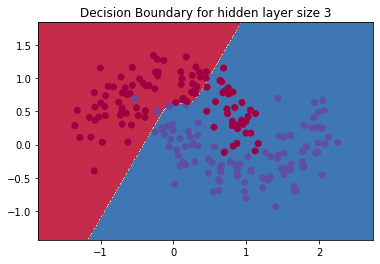

In [ ]:
# Build a model with a 3-dimensional hidden layer
model = build_model(2,print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")